In [1]:
import kagglehub
rrebirrth_animals_with_attributes_2_path = kagglehub.dataset_download('rrebirrth/animals-with-attributes-2')
print('Data source import complete.')

100%|██████████| 13.0G/13.0G [02:25<00:00, 95.7MB/s]

Extracting files...


Data source import complete.


In [3]:
import os

image_paths = {}

base_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/"
animals = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

for dirname, _, filenames in os.walk(base_path):
    for animal in animals:

        if animal in dirname:

            if animal not in image_paths:
                image_paths[animal] = []

            for filename in filenames:
                image_paths[animal].append(os.path.join(dirname, filename))

filtered_image_paths = {}
for animal, paths in image_paths.items():

    sorted_paths = sorted(paths)
    filtered_image_paths[animal] = sorted_paths[:650]

for animal, paths in image_paths.items():
    extra_files = set(paths) - set(filtered_image_paths[animal])
    for file_path in extra_files:
        os.remove(file_path)

In [4]:
total_images = sum(len(paths) for paths in filtered_image_paths.values())
print(f"Filtered image paths contain {total_images} images in total.")


Filtered image paths contain 6500 images in total.


In [5]:
# Normalize images to 128x128 and scale pixel values
import cv2
image_size = (128, 128)
normalized_images = {}
for animal, paths in filtered_image_paths.items():
    normalized_images[animal] = []
    for file_path in paths:
        input_image = cv2.imread(file_path)
        if input_image is not None:
            img_resized = cv2.resize(input_image, image_size)
            img_normalized = img_resized / 255.0
            normalized_images[animal].append(img_normalized)

# Print the paths for verification
for animal, paths in filtered_image_paths.items():
    print(f"{animal}: {len(paths)} images retained and normalized")

giant+panda: 650 images retained and normalized
polar+bear: 650 images retained and normalized
rabbit: 650 images retained and normalized
elephant: 650 images retained and normalized
collie: 650 images retained and normalized
squirrel: 650 images retained and normalized
sheep: 650 images retained and normalized
fox: 650 images retained and normalized
moose: 650 images retained and normalized
dolphin: 650 images retained and normalized


Veri setini sklearn kullanarak train ve test için ayırım ve boyutlarını kontrol ettim

In [6]:
from sklearn.model_selection import train_test_split
X = []
for animal, paths in filtered_image_paths.items():
    X.extend(paths)

y = []
for animal, paths in filtered_image_paths.items():
    y.extend([animal] * len(paths))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
len(X_train)

4550

In [8]:
len(y_test)

1950

veri setindeki fotoğrafların renkli mi siyah beyaz mı olduğunu anlamak için bir kontrol yaptım

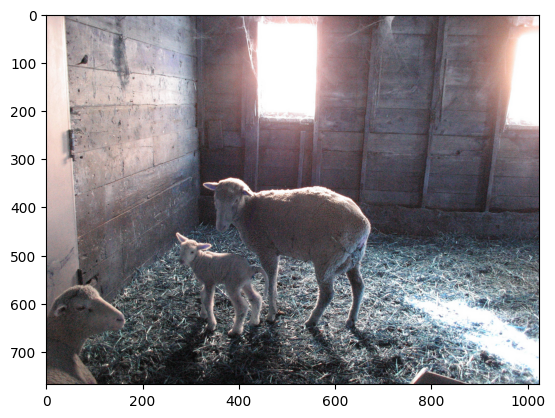

In [9]:
image_path = X_train[0]
import matplotlib.pyplot as plt

image = cv2.imread(image_path)
plt.imshow(image)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model parameters
image_size = (128, 128, 3)  # Input image dimensions
num_classes = 10           # Number of animal classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.15),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import numpy as np

def load_and_preprocess_image(image_path):
    input_image = cv2.imread(image_path)
    if input_image is not None:
        img_resized = cv2.resize(input_image, image_size[:2])  # Resize to (128, 128)
        img_normalized = img_resized / 255.0  # Normalize
        return img_normalized
    else:
        return None

X_train_processed = np.array([load_and_preprocess_image(path) for path in X_train if load_and_preprocess_image(path) is not None])
X_test_processed = np.array([load_and_preprocess_image(path) for path in X_test if load_and_preprocess_image(path) is not None])


In [12]:
len(X_train_processed)

4550

In [23]:
# Convert labels to numerical format using one-hot encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# Fit the model using the preprocessed data
model.fit(X_train_processed, y_train_categorical,
          batch_size=32,
          epochs=32,
          verbose=1,
          validation_data=(X_test_processed, y_test_categorical))

Epoch 1/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.9664 - loss: 0.0966 - val_accuracy: 0.6118 - val_loss: 2.3144
Epoch 2/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9727 - loss: 0.0911 - val_accuracy: 0.6164 - val_loss: 2.2357
Epoch 3/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9743 - loss: 0.0797 - val_accuracy: 0.6262 - val_loss: 2.4250
Epoch 4/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9795 - loss: 0.0745 - val_accuracy: 0.6364 - val_loss: 2.3585
Epoch 5/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9740 - loss: 0.0792 - val_accuracy: 0.6154 - val_loss: 2.1893
Epoch 6/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9737 - loss: 0.0823 - val_accuracy: 0.6123 - val_loss: 2.4859
Epoch 7/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9718 - loss: 0.0809 - val_accuracy: 0.6128 - val_loss: 2.4462
Epoch 8/32
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9713 - loss: 0.0866 - val_acc

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

y_pred = model.predict(X_test_processed)

y_pred_labels = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test_categorical, axis=1)

# Precision, Recall ve F1 Score hesaplama
_, accuracy = model.evaluate(X_test_processed, y_test_categorical, verbose=0)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f"Model accuracy: {accuracy * 100:.1f}%")
print(f"Precision: {precision* 100:.1f}%")
print(f"Recall: {recall* 100:.1f}%")
print(f"F1 Score: {f1* 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model accuracy: 62.6%
Precision: 62.0%
Recall: 62.6%
F1 Score: 61.9%

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       191
           1       0.79      0.89      0.84       196
           2       0.62      0.70      0.66       178
           3       0.53      0.51      0.52       189
           4       0.76      0.80      0.78       218
           5       0.59      0.54      0.56       195
           6       0.58      0.79      0.67       190
           7       0.60      0.57      0.59       202
           8       0.64      0.60      0.62       189
           9       0.52      0.38      0.44       202

    accuracy                           0.63      1950
   macro avg       0.62      0.62      0.62      1950
weighted avg       0.62      0.63      0.62      1950



In [25]:
import joblib
model_file="aygaz.pkl"
joblib.dump(model,model_file)
print(f"Dosya: '{model_file}'olarak kaydedildi")


Dosya: 'aygaz.pkl'olarak kaydedildi


In [26]:
image_size = (128, 128)
num_classes = 10

#  Manipülasyon Fonksiyonu
def get_manipulated_images(image_paths, output_dir, light_factor=1.1):


  manipulated_images = []
  for path in image_paths:
      img = cv2.imread(path)
      if img is not None:
          manipulated = cv2.convertScaleAbs(img, alpha=light_factor, beta=0)
          manipulated_resized = cv2.resize(manipulated, image_size[:2])
          manipulated_images.append(manipulated_resized / 255.0)

          # Manipüle edilmiş resmi kaydet
          filename = os.path.basename(path)
          output_path = os.path.join(output_dir, filename)
          cv2.imwrite(output_path, manipulated)
      else:
          print(f"Error: Could not read image at {path}")

  return np.array(manipulated_images)

# Gray World Algoritması (Renk Sabitliği)
def get_wb_images(images):

    wb_images = []
    for img in images:
        mean_r = np.mean(img[:, :, 0])
        mean_g = np.mean(img[:, :, 1])
        mean_b = np.mean(img[:, :, 2])
        avg_gray = (mean_r + mean_g + mean_b) / 3
        if mean_r == 0 or mean_g == 0 or mean_b == 0:
          print("Warning: Division by zero encountered in image. Skipping color balancing.")
          wb_images.append(img)
          continue
        wb_img = img.copy()
        wb_img[:, :, 0] = np.clip((img[:, :, 0] * (avg_gray / mean_r)),0,255)
        wb_img[:, :, 1] = np.clip((img[:, :, 1] * (avg_gray / mean_g)),0,255)
        wb_img[:, :, 2] = np.clip((img[:, :, 2] * (avg_gray / mean_b)),0,255)
        wb_images.append(wb_img)
    return np.array(wb_images)

# Modeli Yükleme
model = joblib.load('aygaz.pkl')

output_dir = 'manipulated_images'
os.makedirs(output_dir, exist_ok=True)

X_test_manipulated = get_manipulated_images(X_test, output_dir)
y_pred_manipulated = model.predict(X_test_manipulated)
accuracy_manipulated = np.mean(np.argmax(y_pred_manipulated, axis=1) == y_test_encoded)
print(f"Manipüle edilmiş test setindeki başarı oranı: {accuracy_manipulated:.2%}")

X_test_wb = get_wb_images(X_test_manipulated)
y_pred_wb = model.predict(X_test_wb)
accuracy_wb = np.mean(np.argmax(y_pred_wb, axis=1) == y_test_encoded)
print(f"Renk sabitliği uygulanmış test setindeki başarı oranı: {accuracy_wb:.2%}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Manipüle edilmiş test setindeki başarı oranı: 61.54%
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Renk sabitliği uygulanmış test setindeki başarı oranı: 51.03%
